In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
import sklearn.linear_model as linear_model
import obspy
plt.rcParams.update({'font.size': 12})

In [2]:
def load_depths(daynumber):
    df = pd.read_csv(str(daynumber)+'precision.csv')
    df['origin_time'] = df.origin_time.apply(obspy.UTCDateTime)
    df['times'] = df.origin_time.diff().cumsum().fillna(0)
    # df['t3'] = df['t3'].apply(dates.num2date)
    # df['t4'] = df['t4'].apply(dates.num2date)
    # df['t5'] = df['t5'].apply(dates.num2date)
    # df['t6'] = df['t6'].apply(dates.num2date)
    df['init_arrival_time'] = df.init_arrival_time.apply(dates.num2date).apply(obspy.UTCDateTime)
    return df

df211 = load_depths(211)


/localscratch/814570/ipykernel_2576392/1711782893.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['times'] = df.origin_time.diff().cumsum().fillna(0)


In [3]:
df211.first_hydrophone.unique()

array([4, 0, 5, 2, 3, 1])

<Axes: >

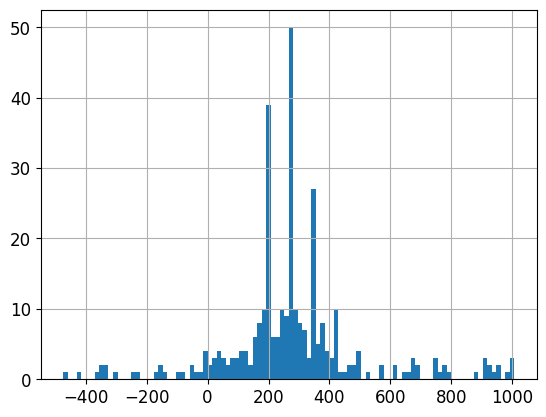

In [4]:
df211.depth.hist(bins=100)

<Axes: >

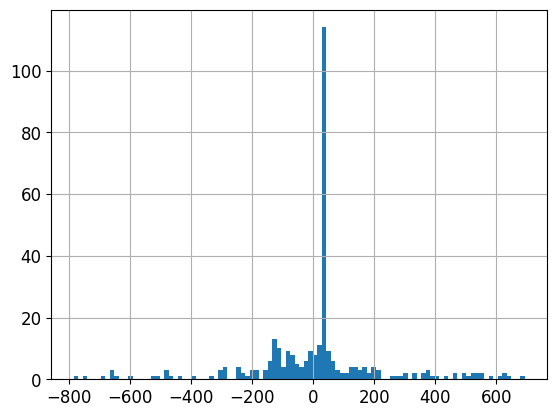

In [5]:
df211.relative_depth.hist(bins=100)

In [6]:
df211

Unnamed: 0   id                                t3  \
0             0    0  2019-07-30 22:34:38.341999+00:00   
1             1    1  2019-07-30 22:34:47.313999+00:00   
2             2    2  2019-07-30 22:34:47.583999+00:00   
3             3    3  2019-07-30 22:34:48.977999+00:00   
4             4    4  2019-07-30 22:34:49.274999+00:00   
..          ...  ...                               ...   
320         320  320  2019-07-30 23:00:57.816999+00:00   
321         321  321  2019-07-30 23:00:58.237999+00:00   
322         322  322  2019-07-30 23:00:58.687999+00:00   
323         323  323  2019-07-30 23:00:59.642999+00:00   
324         324  324  2019-07-30 23:01:00.553999+00:00   

                                   t4                                t5  \
0    2019-07-30 22:34:38.446999+00:00  2019-07-30 22:34:38.531999+00:00   
1    2019-07-30 22:34:47.212999+00:00  2019-07-30 22:34:47.312999+00:00   
2    2019-07-30 22:34:47.577999+00:00  2019-07-30 22:34:47.644999+00:00   
3    2019-07-30 22:34:48.855999+00:00  2019-07-30 22:34:48.976999+00:00   
4    2019-07-30 22:34:49.269999+00:00  2019-07-30 22:34:49.304999+00:00   
..                                ...                               ...   
320  2019-07-30 23:00:57.814999+00:00  2019-07-30 23:00:57.879999+00:00   
321  2019-07-30 23:00:58.142999+00:00  2019-07-30 23:00:58.145999+00:00   
322  2019-07-30 23:00:58.681999+00:00  2019-07-30 23:00:58.525999+00:00   
323  2019-07-30 23:00:59.642999+00:00  2019-07-30 23:00:59.524999+00:00   
324  2019-07-30 23:01:00.610999+00:00  2019-07-30 23:01:00.419999+00:00   

                                   t6  first_hydrophone  second_hydrophone  \
0    2019-07-30 22:34:38.378999+00:00                 4                  5   
1    2019-07-30 22:34:47.203999+00:00                 0                  2   
2    2019-07-30 22:34:47.551999+00:00                 5                  2   
3    2019-07-30 22:34:48.977999+00:00                 0                  3   
4    2019-07-30 22:34:49.259999+00:00                 2                  0   
..                                ...               ...                ...   
320  2019-07-30 23:00:57.766999+00:00                 2                  4   
321  2019-07-30 23:00:58.339999+00:00                 3                  4   
322  2019-07-30 23:00:58.722999+00:00                 3                  5   
323  2019-07-30 23:00:59.524999+00:00                 5                  0   
324  2019-07-30 23:01:00.419999+00:00                 1                  5   

     relative_depth       depth        dt   max_amp  \
0       -132.125875   37.874125 -0.191001 -0.002544   
1         36.750000  206.750000  0.001000 -0.088611   
2        195.125000  365.125000 -0.061000  0.710583   
3         35.000000  205.000000  0.000000 -0.076316   
4         35.000000  205.000000  0.000000  0.585934   
..              ...         ...       ...       ...   
320     -162.750000  217.250000 -0.113000  0.120833   
321       35.000000  415.000000  0.000000  0.128888   
322       38.500000  418.500000  0.002000  0.151359   
323      551.250000  931.250000 -0.118000  1.655623   
324     -605.500000 -225.500000 -0.183000 -0.074196   

                     origin_time arrival_hydrophone  \
0    2019-07-30T22:34:38.417500Z                 h3   
1    2019-07-30T22:34:47.292999Z                 h3   
2    2019-07-30T22:34:47.472499Z                 h3   
3    2019-07-30T22:34:48.957999Z                 h3   
4    2019-07-30T22:34:49.254999Z                 h3   
..                           ...                ...   
320  2019-07-30T23:00:57.859999Z                 h6   
321  2019-07-30T23:00:58.319999Z                 h6   
322  2019-07-30T23:00:58.700999Z                 h6   
323  2019-07-30T23:00:59.209999Z                 h6   
324  2019-07-30T23:01:00.765999Z                 h6   

               init_arrival_time        times  
0    2019-07-30T22:34:38.534999Z     0.000000  
1    2019-07-30T22:34:47.315998Z     8.875499  
2   

<Axes: >

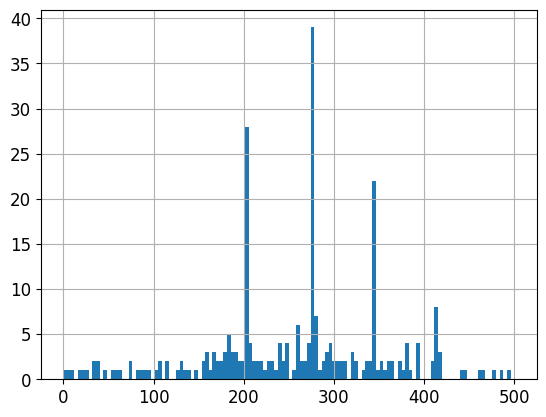

In [7]:
df211.depth.hist(bins=np.linspace(0, 500, 125))

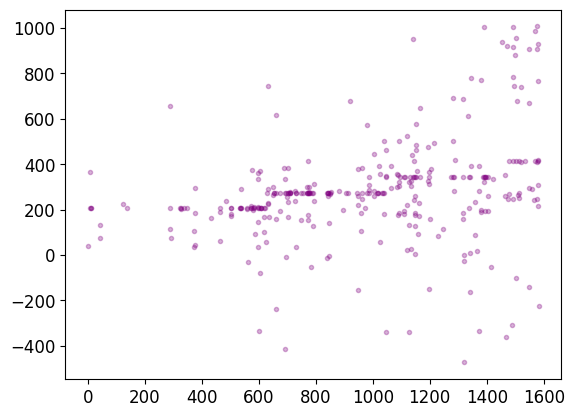

In [8]:
fig, ax = plt.subplots()

ax.scatter(df211.times, df211.depth, marker='.', color='purple', alpha=0.3)

# ax.set_ylim(0, 500)

In [9]:
df211.origin_time.diff().cumsum().fillna(0)

/localscratch/814570/ipykernel_2576392/979005148.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df211.origin_time.diff().cumsum().fillna(0)


0         0.000000
1         8.875499
2         9.054999
3        10.540499
4        10.837499
          ...     
320    1579.442499
321    1579.902499
322    1580.283499
323    1580.792499
324    1582.348499
Name: origin_time, Length: 325, dtype: float64

<Axes: >

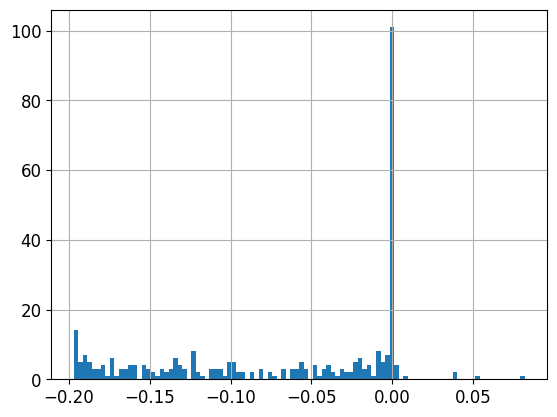

In [10]:
df211.dt.hist(bins=100)

In [11]:
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import config

day_number = 211

paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=day_number)

swarm_starttime = config.swarm_starttime[str(day_number)]
swarm_endtime = config.swarm_endtime[str(day_number)]

waveforms = load.import_corrected_data_for_single_day(paths=paths)
waveforms = waveforms[2:]
waveforms.trim(starttime=swarm_starttime, endtime=swarm_endtime)
waveforms.filter(type='highpass', freq=50, zerophase=False, corners=1)

4 Trace(s) in Stream:
7F.A00.03.GDH | 2019-07-30T22:30:05.142999Z - 2019-07-30T23:07:04.430999Z | 1000.0 Hz, 2219289 samples
7F.A00.04.GDH | 2019-07-30T22:30:05.142999Z - 2019-07-30T23:07:04.430999Z | 1000.0 Hz, 2219289 samples
7F.A00.05.GDH | 2019-07-30T22:30:05.142999Z - 2019-07-30T23:07:04.430999Z | 1000.0 Hz, 2219289 samples
7F.A00.06.GDH | 2019-07-30T22:30:05.142999Z - 2019-07-30T23:07:04.430999Z | 1000.0 Hz, 2219289 samples

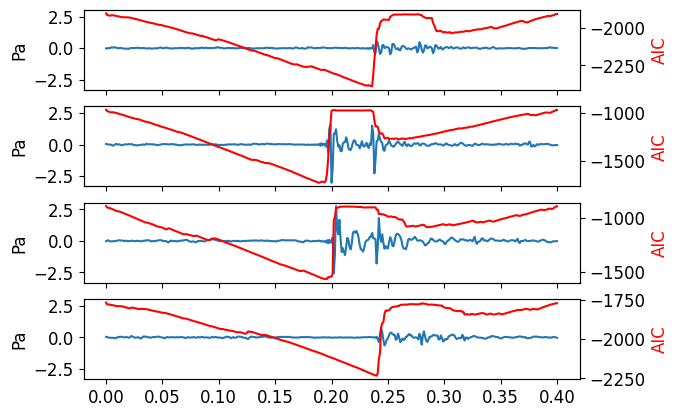

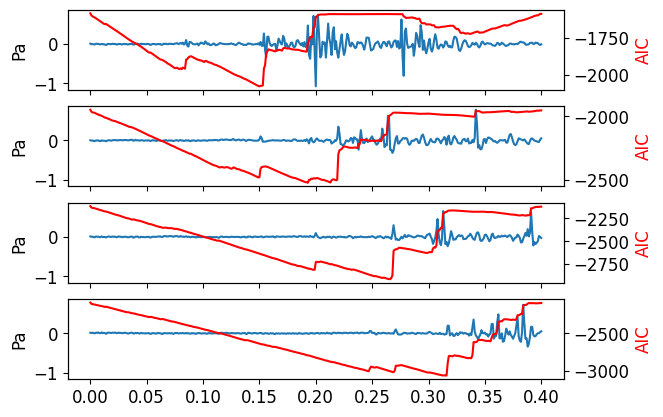

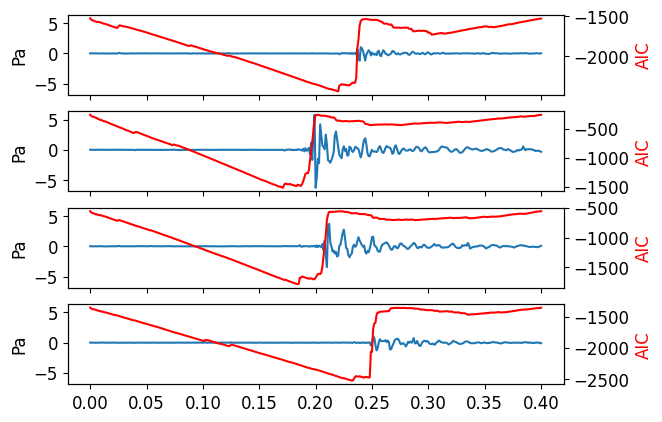

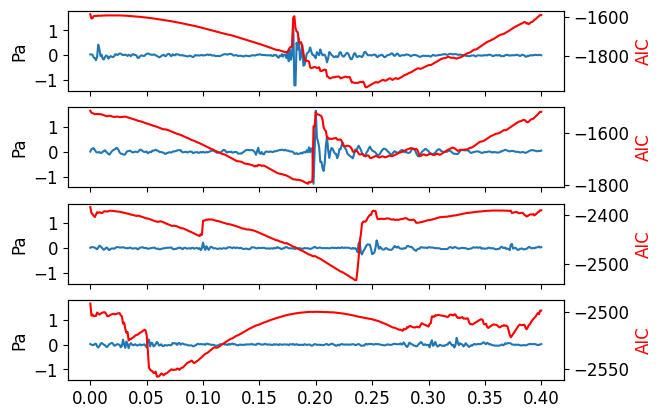

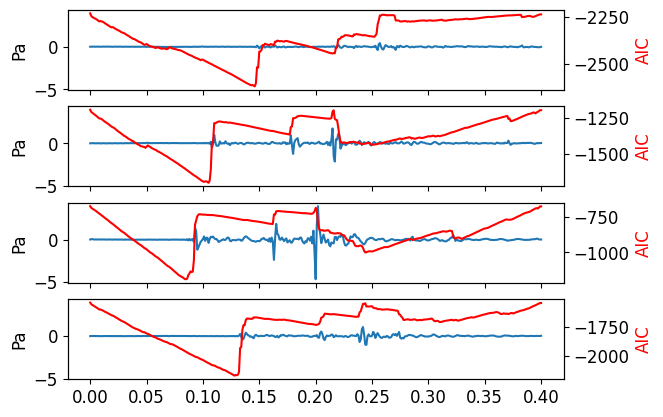

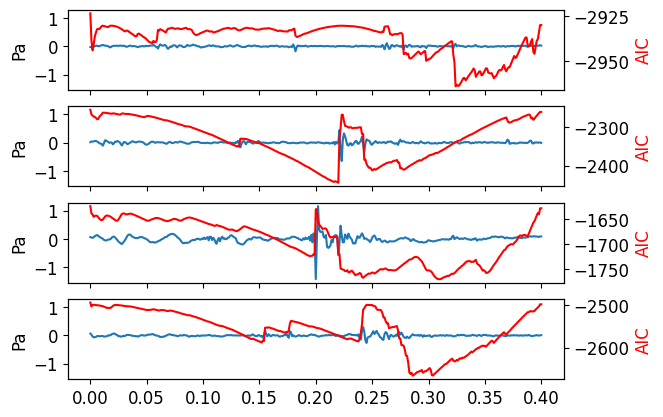

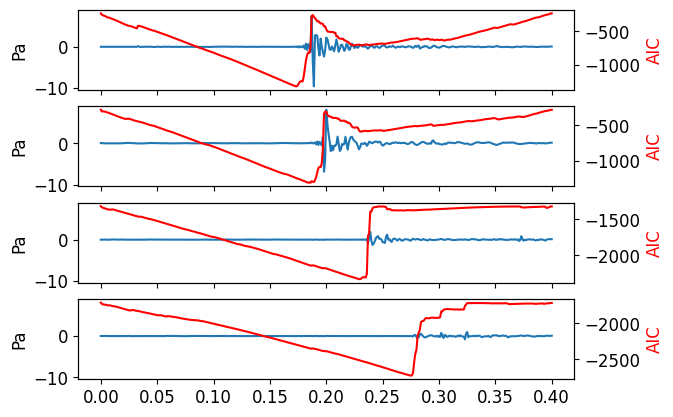

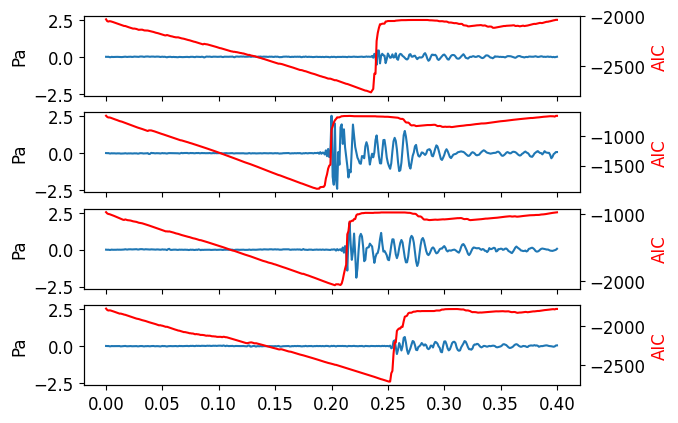

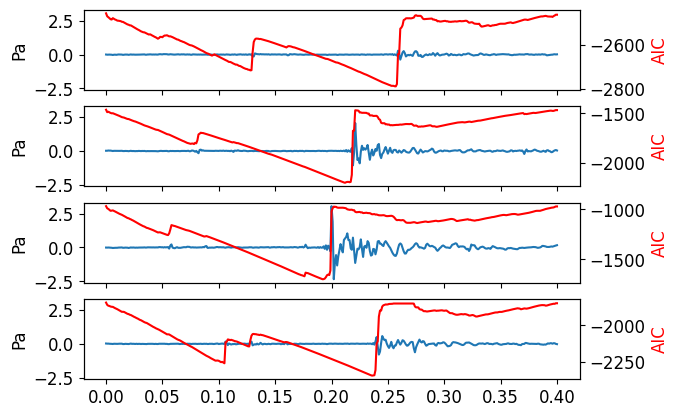

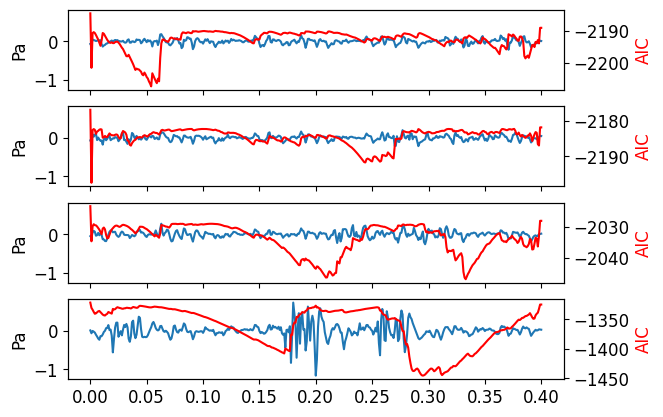

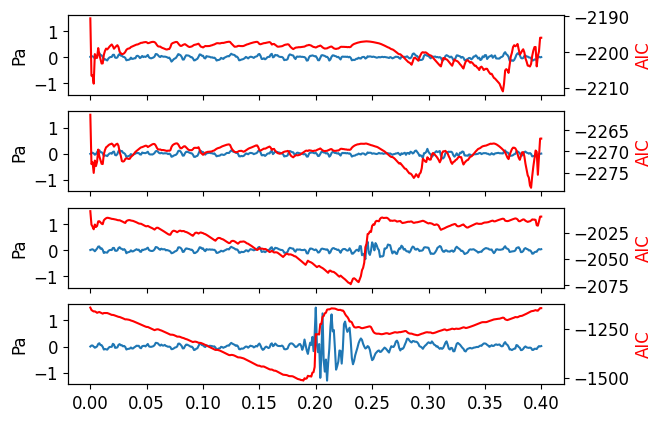

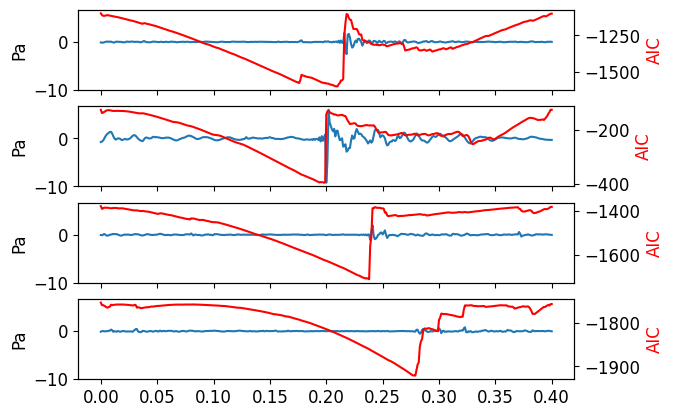

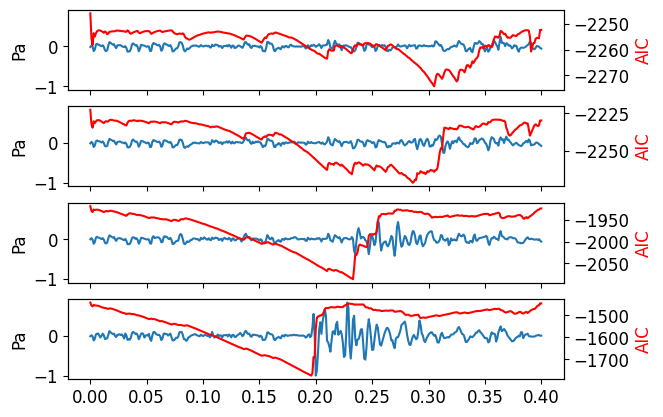

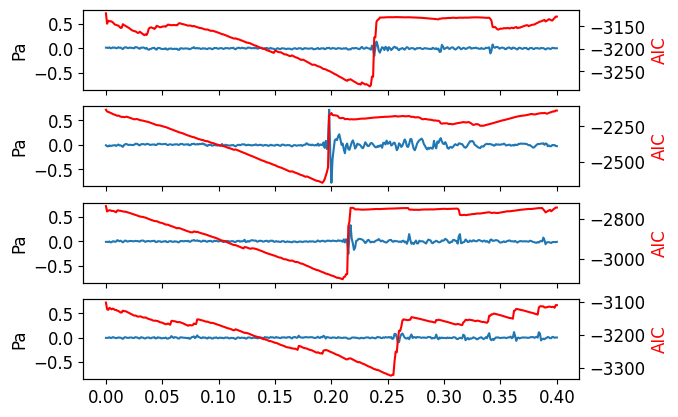

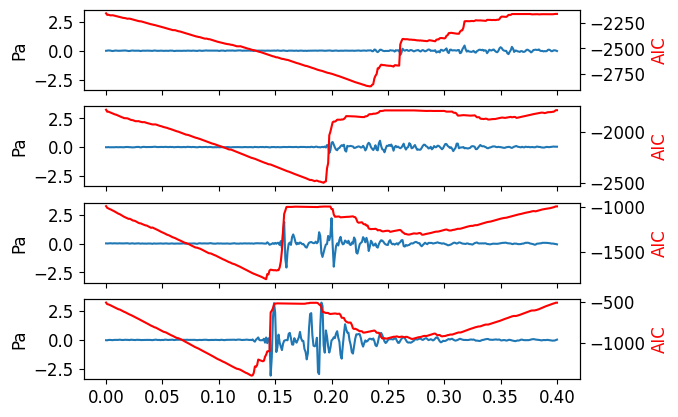

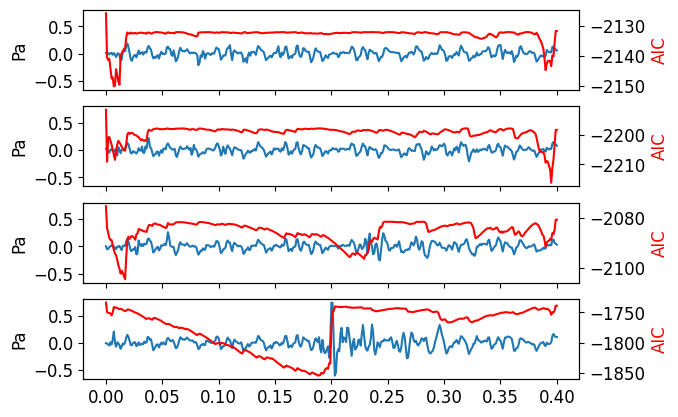

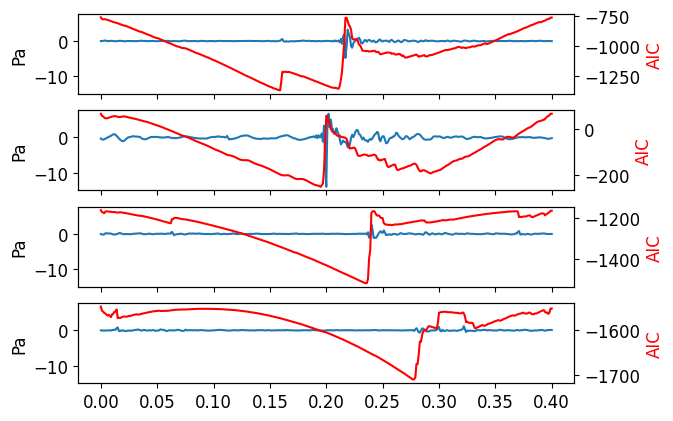

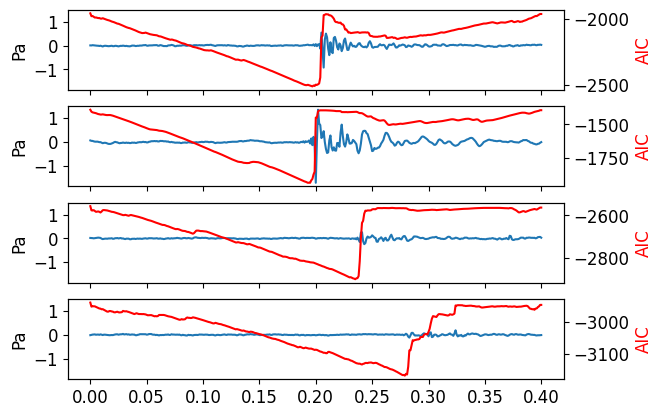

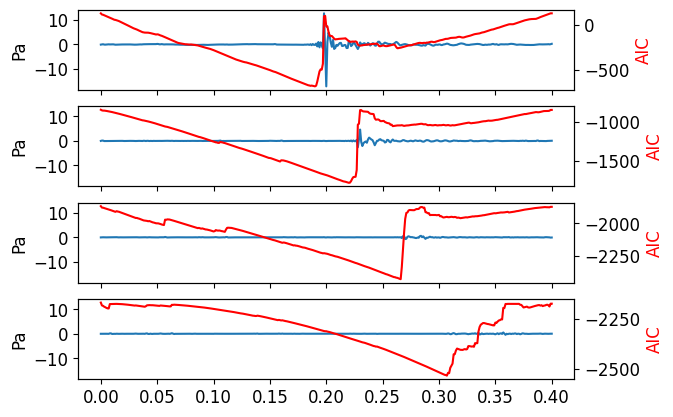

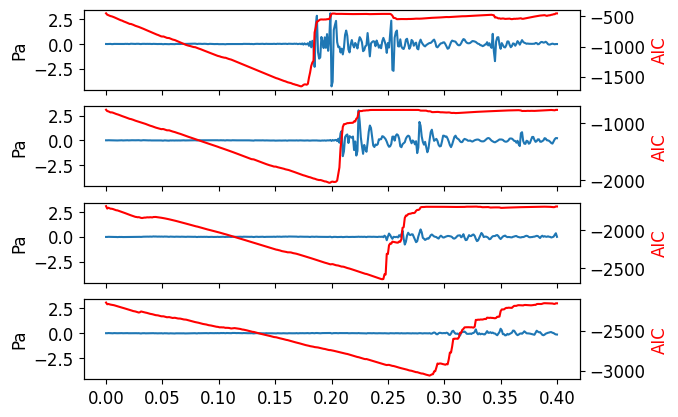

In [12]:
import obspy.signal.trigger as trigger

for e in df211.sample(20).iterrows():
    starttime = obspy.UTCDateTime(e[1].init_arrival_time) - 0.2
    endtime = obspy.UTCDateTime(e[1].init_arrival_time) + 0.2
    st = waveforms.copy().trim(starttime=starttime, endtime=endtime)

    # aics = [np.loadtxt(f'aics/{e[0]}_{n}.txt') for n in np.arange(0, 4, 1)]
    # aics = [trigger.aic_simple(

    fig, ax = plt.subplots(4, 1, sharex=True, sharey=True)
    for n, tr in enumerate(st):
        aic = trigger.aic_simple(tr.data)
        
        ax[n].plot(tr.times(), tr.data)
        ax2 = ax[n].twinx()
        # ax2.plot(tr.times(), e[1][f'aic{n+3}'].values, color='red')
        # ax2.plot(tr.times(), aics[n], color='red')
        ax2.plot(tr.times(), aic, color='red')
        ax[n].set_ylabel('Pa')
        ax2.set_ylabel('AIC', color='red')

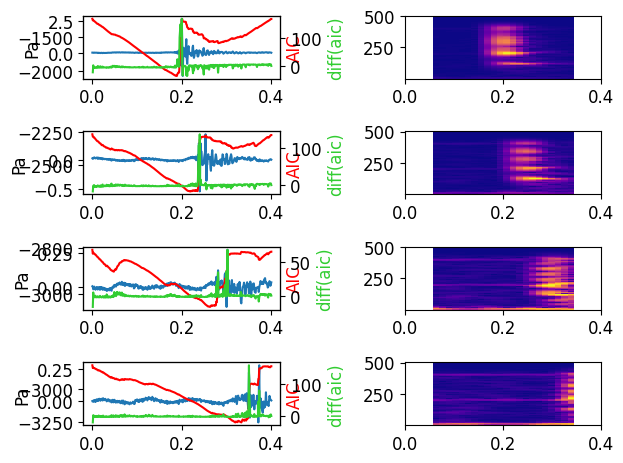

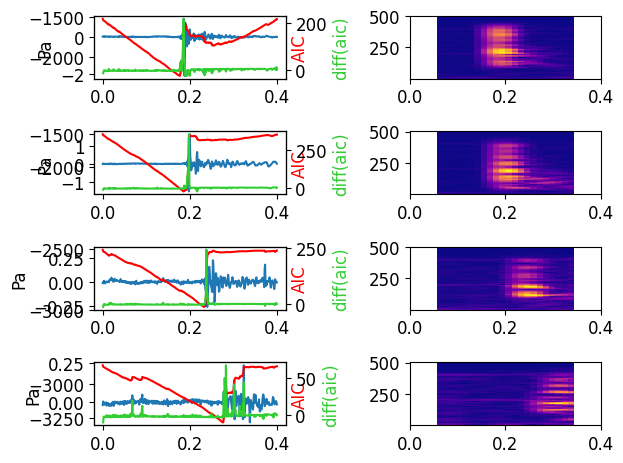

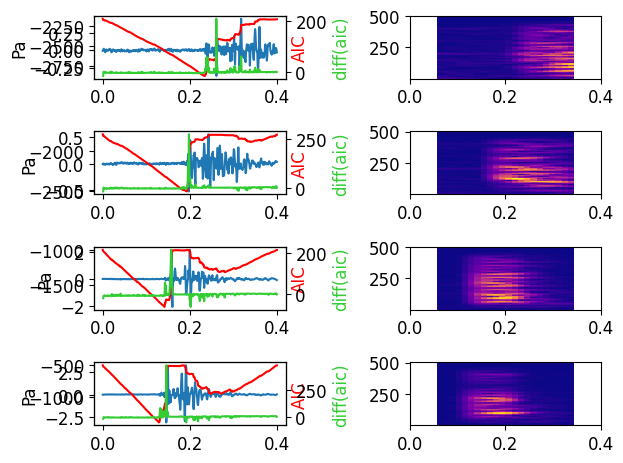

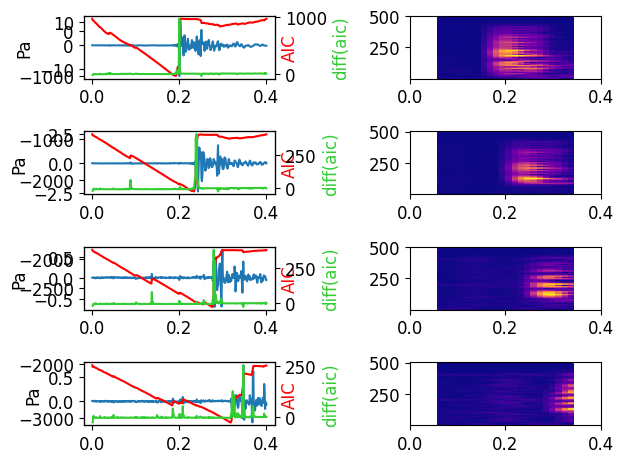

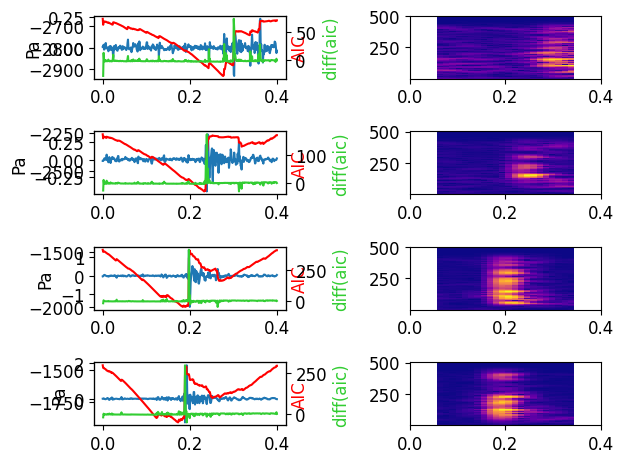

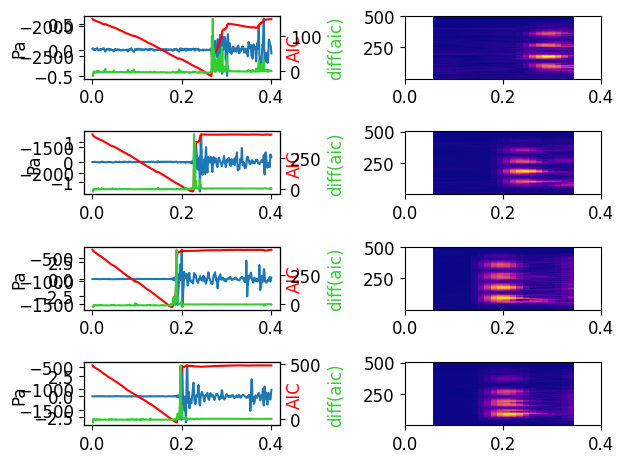

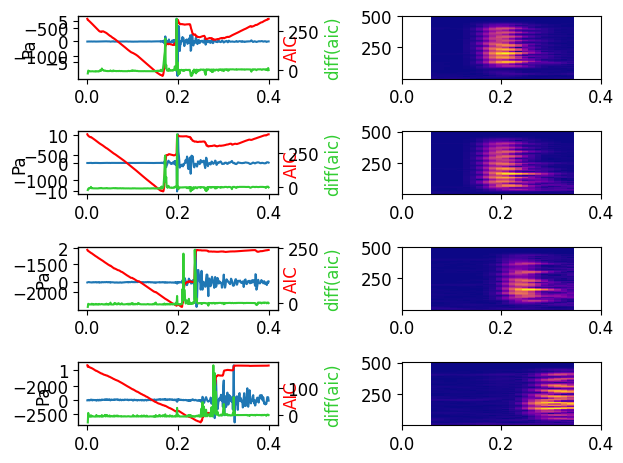

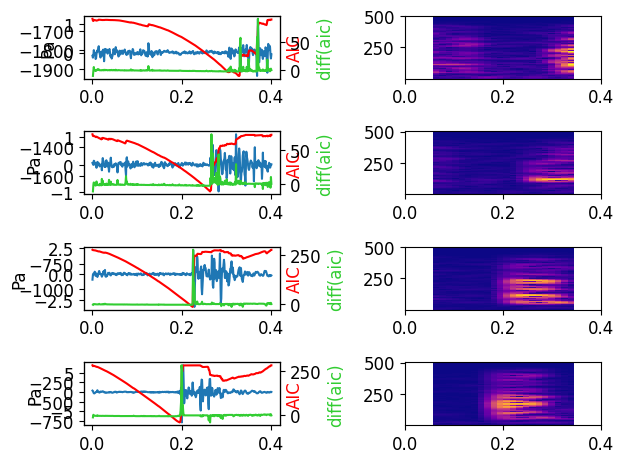

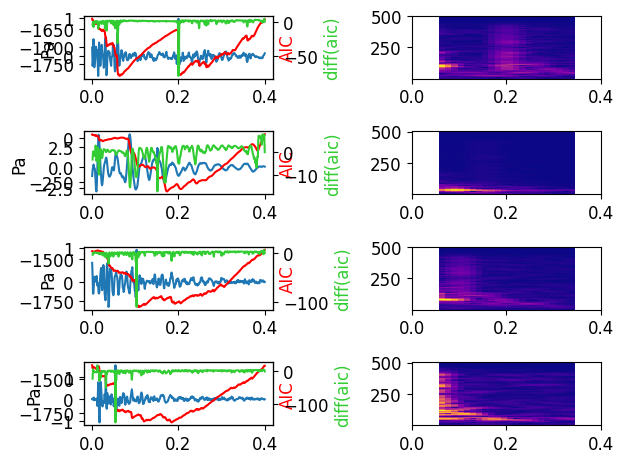

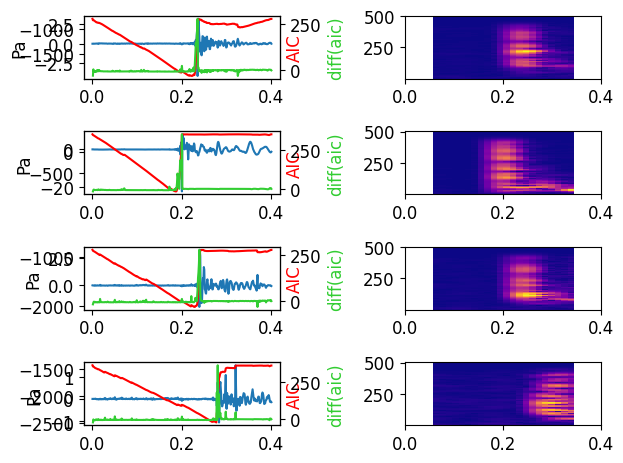

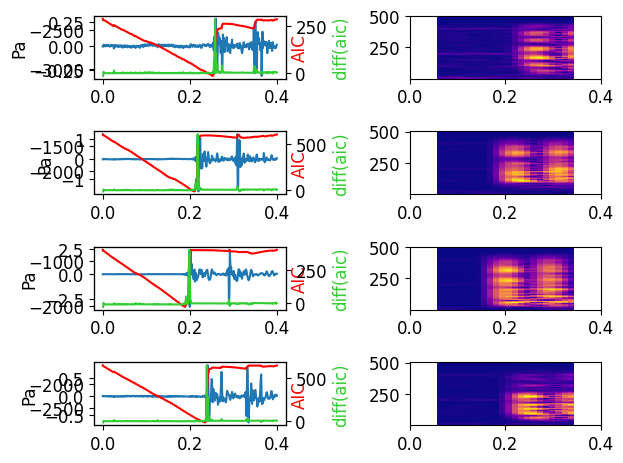

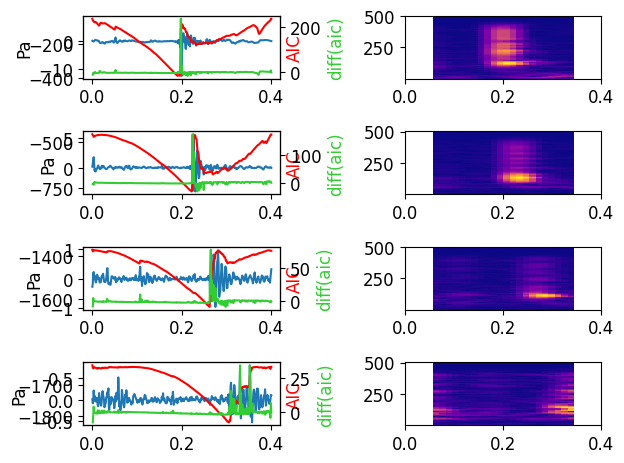

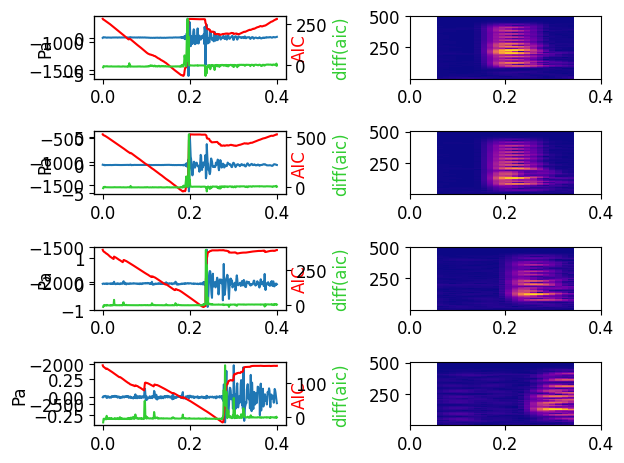

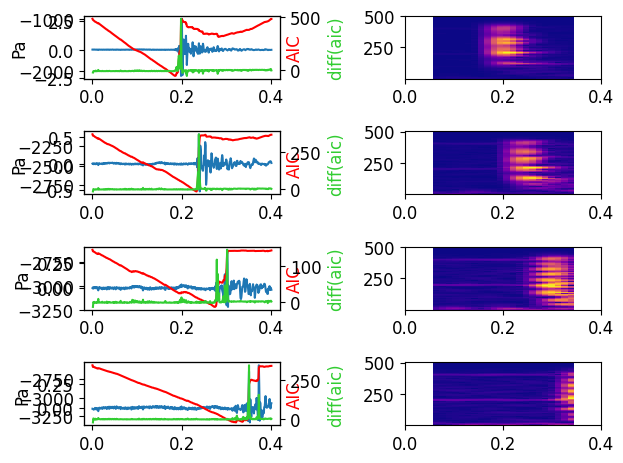

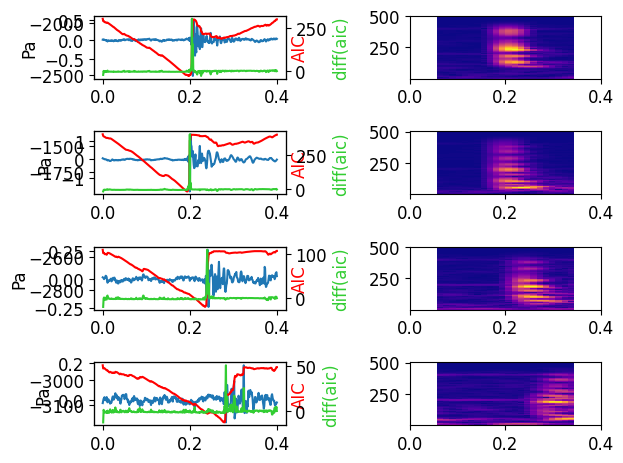

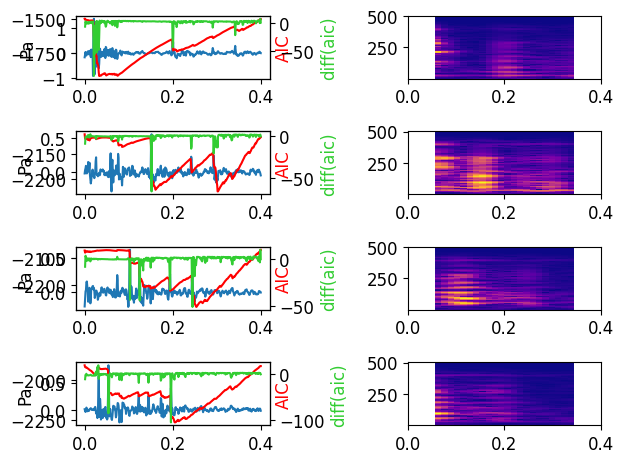

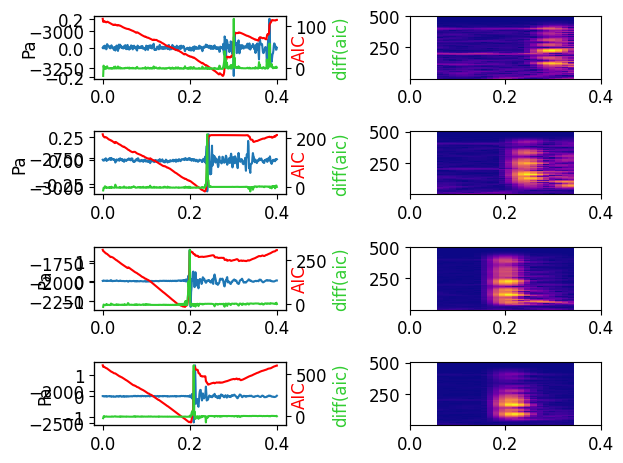

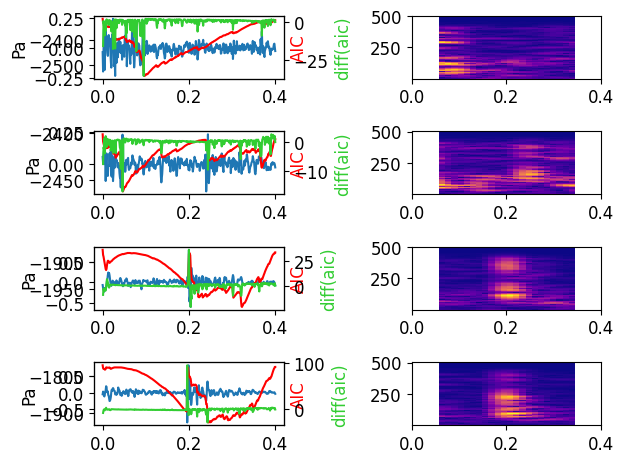

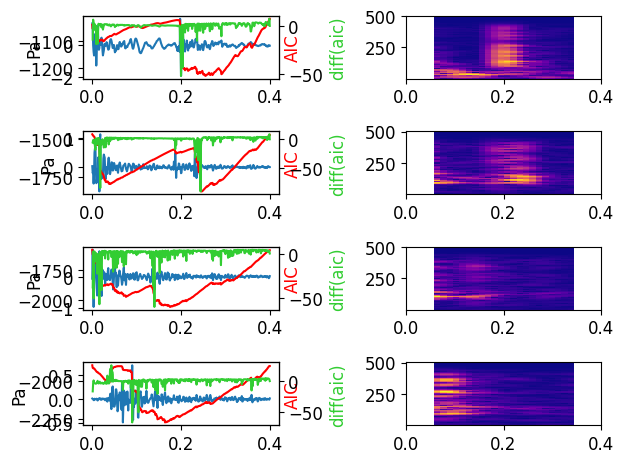

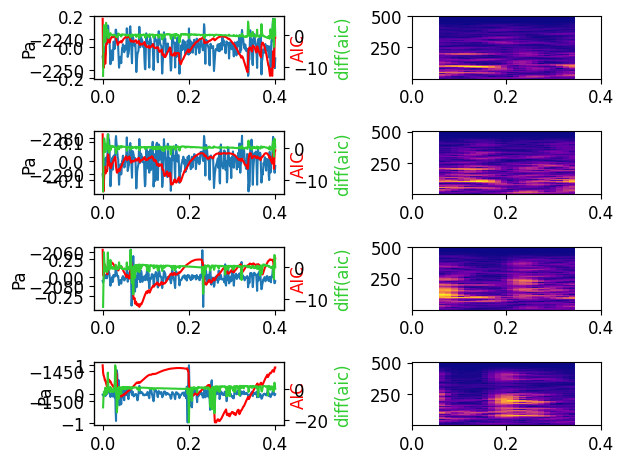

In [17]:
import obspy.signal.trigger as trigger

for e in df211.sample(20).iterrows():
    starttime = obspy.UTCDateTime(e[1].init_arrival_time) - 0.2
    endtime = obspy.UTCDateTime(e[1].init_arrival_time) + 0.2
    st = waveforms.copy().trim(starttime=starttime, endtime=endtime)

    fig, ax = plt.subplots(4, 2)
    for n, tr in enumerate(st):
        aic = trigger.aic_simple(tr.data)
        
        ax[n][0].plot(tr.times(), tr.data)
        ax2 = ax[n][0].twinx()
        ax2.plot(tr.times(), aic, color='red')

        ax3 = ax2.twinx()
        ax3.plot(tr.times()[1:], np.diff(aic), color='limegreen')
        ax3.set_ylabel('diff(aic)', color='limegreen')
        
        ax[n][0].set_ylabel('Pa')
        ax2.set_ylabel('AIC', color='red')

        tr.spectrogram(cmap='plasma', axes=ax[n][1])
        fig.tight_layout()

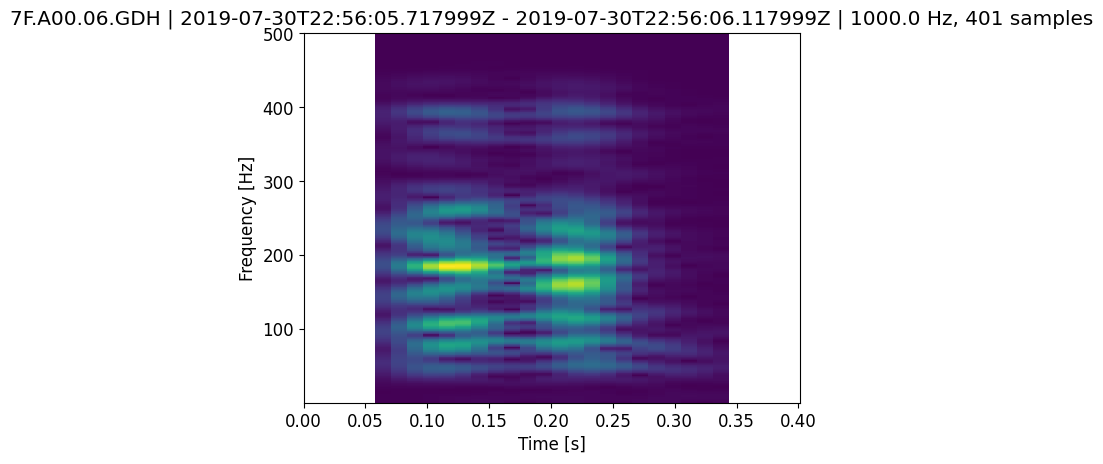

In [14]:
tr.spectrogram()

In [15]:
for e in df211.sample(20).iterrows():
    starttime = obspy.UTCDateTime(e[1].init_arrival_time) - 0.2
    endtime = obspy.UTCDateTime(e[1].init_arrival_time) + 0.2
    st = waveforms.copy().trim(starttime=starttime, endtime=endtime)
    fig, ax = plt.subplots(4, 2,
    st.spectrogram(cmap='plasma')
    

SyntaxError: incomplete input (1960754208.py, line 7)

In [ ]:
df211.sample(10)

In [ ]:
for e in df211.sample(10).iterrows():
    print(e[1].origin_time)

In [ ]:
import ast
